## Lab Enhancement - Lab05 Dimension Reduction Using Principal Component Analysis (PCA)

Lab Enhancement by Cheong Jun Uin (1221305229)


# Necessary Original Codes (Unhide code cells for reference)

In [1]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

# from google.colab import drive
# import os

# drive.mount('/content/drive')

In [2]:
# notebook_path = r"/content/drive/MyDrive/Classroom/_ML2425T3(2430)/__ML2425T3(2430)_SHARED__/Labs/Lab05_PCA"
# os.chdir(notebook_path)
# !pwd

## Import Libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration - Breast Cancer Dataset

In [4]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

cancer_data          = dataset.data
cancer_labels        = dataset.target
cancer_feature_names = dataset.feature_names

# We will not use the labels since we are doing unsupervised learning
# nevertheless, this is just for us to explore the data
print(type(cancer_data))
print(type(cancer_labels))
print(type(cancer_feature_names))

print(cancer_data.shape)
print(cancer_labels.shape)
print(cancer_feature_names.shape)

print(cancer_data)
print(cancer_labels)
print(cancer_feature_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(569, 30)
(569,)
(30,)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 

In [5]:
cancer_labels = cancer_labels.reshape( (569, 1) )  # flatten the matrix into a vector

cancer_df = pd.DataFrame(np.concatenate( [cancer_data, cancer_labels], axis = 1 ) )

cancer_df.columns = np.append(cancer_feature_names, 'label')

# cancer_df["label"].replace(0, "Benign",    inplace = True)   # will not work in future pandas 3.0
# cancer_df["label"].replace(1, "Malignant", inplace = True)   # will not work in future pandas 3.0
cancer_df["label"] = cancer_df["label"].replace(0, "Benign")
cancer_df["label"] = cancer_df["label"].replace(1, "Malignant")

In [6]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


## Data Exploration - CIFAR-10

Reference: https://www.cs.toronto.edu/~kriz/cifar.html

In [7]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

# Note: We are taking only a small subset of the data
(X_train, y_train), (X_test, y_test) = (X_train[:800], y_train[:800]),  \
                                       (X_test[:200],  y_test[:200])

print()
print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (50000, 32, 32, 3)
X_test.shape = (10000, 32, 32, 3)
y_train.shape = (50000, 1)
y_test.shape = (10000, 1)

X_train.shape = (800, 32, 32, 3)
X_test.shape = (200, 32, 32, 3)
y_train.shape = (800, 1)
y_test.shape = (200, 1)


Let's also find out the total number of labels and the various kinds of classes the data has.


In [8]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
n_classes = len(classes)

print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [9]:
label_dict = {
              0: 'airplane', 1: 'automobile', 2: 'bird',  3: 'cat',  4: 'deer',
              5: 'dog',      6: 'frog',       7: 'horse', 8: 'ship', 9: 'truck'
             }

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


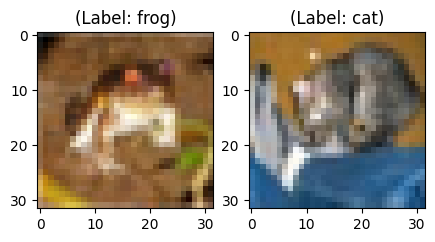

In [10]:
plt.figure(figsize = [5, 5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (32, 32, 3))
plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0],(32, 32, 3))
plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))
plt.show()

# Data Visualization using PCA - Breast Cancer Dataset

### Preprocessing - Data Normalization

In [11]:
from sklearn.preprocessing import StandardScaler

X = cancer_df.loc[:, cancer_feature_names].values
X = StandardScaler().fit_transform(X) # normalizing the features

print(X.shape)

print("np.mean(X) =", np.mean(X))
print("np.std(X) =", np.std(X))

feature_columns = ['feature' + str(i) for i in range(X.shape[1])]

X_normalized = pd.DataFrame(X, columns = feature_columns)

(569, 30)
np.mean(X) = -6.826538293184326e-17
np.std(X) = 1.0


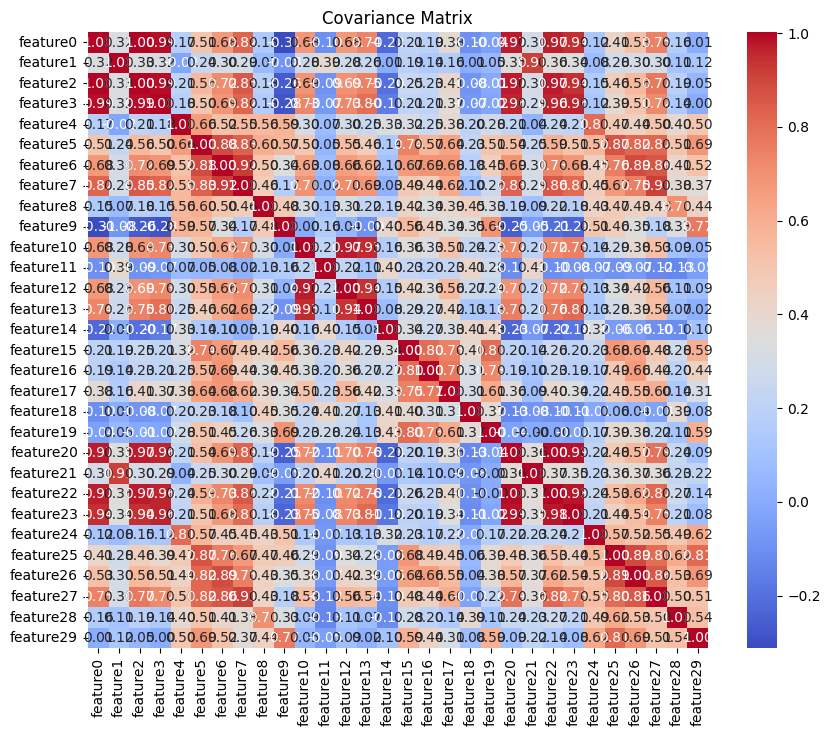

In [12]:
import seaborn as sns

cov_matrix = np.cov(X_normalized, rowvar=False)  # rowvar=False means columns are variables

cov_df = pd.DataFrame(cov_matrix, columns=feature_columns, index=feature_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()

The covariance matrix heatmap provides these key observations:

**Feature Relationships**: Strong positive or negative covariances (red/blue blocks) indicate correlated features, which PCA can combine into principal components to reduce redundancy.

**Variance Importance**: Diagonal elements (variance) highlight features contributing the most to data spread, guiding PCA in identifying key components.

In [13]:
from sklearn.decomposition import PCA

cancer_pca = PCA(n_components = 2)
cancer_principal_components = cancer_pca.fit_transform(X)

cancer_pca_df = pd.DataFrame(data = cancer_principal_components,
                             columns = ["principal component 1", "principal component 2"])

# Calculate explained variance ratio
explained_variance_ratio = cancer_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the results
print("Explained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3f} cumulative)")
    
cancer_pca_df.tail()

Explained variance ratio by component:
PC1: 0.443 (0.443 cumulative)
PC2: 0.190 (0.632 cumulative)


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


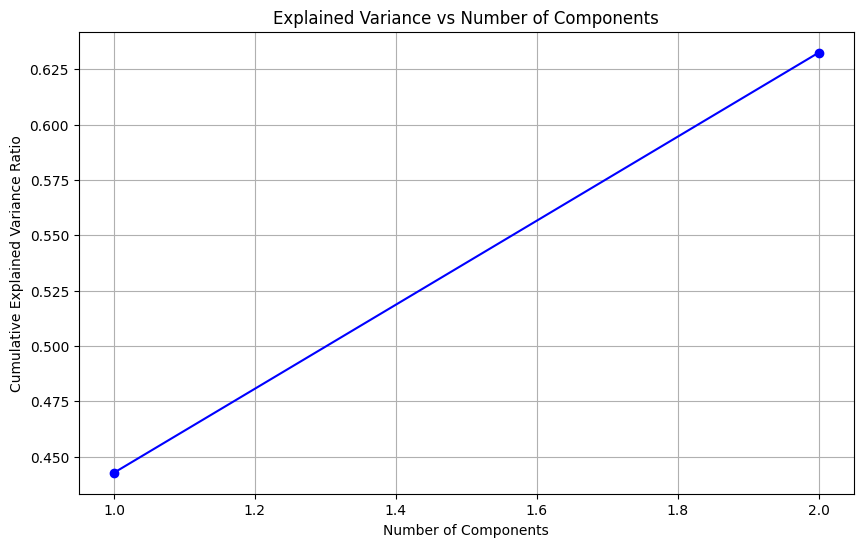

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cancer_pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

****DataFrame of feature loadings****

In [15]:
loadings = pd.DataFrame(
    cancer_pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(cancer_pca.components_))],
)

print("\nFeature loadings:")
print(loadings)


Feature loadings:
         PC1       PC2
0   0.218902 -0.233857
1   0.103725 -0.059706
2   0.227537 -0.215181
3   0.220995 -0.231077
4   0.142590  0.186113
5   0.239285  0.151892
6   0.258400  0.060165
7   0.260854 -0.034768
8   0.138167  0.190349
9   0.064363  0.366575
10  0.205979 -0.105552
11  0.017428  0.089980
12  0.211326 -0.089457
13  0.202870 -0.152293
14  0.014531  0.204430
15  0.170393  0.232716
16  0.153590  0.197207
17  0.183417  0.130322
18  0.042498  0.183848
19  0.102568  0.280092
20  0.227997 -0.219866
21  0.104469 -0.045467
22  0.236640 -0.199878
23  0.224871 -0.219352
24  0.127953  0.172304
25  0.210096  0.143593
26  0.228768  0.097964
27  0.250886 -0.008257
28  0.122905  0.141883
29  0.131784  0.275339


<Figure size 640x480 with 0 Axes>

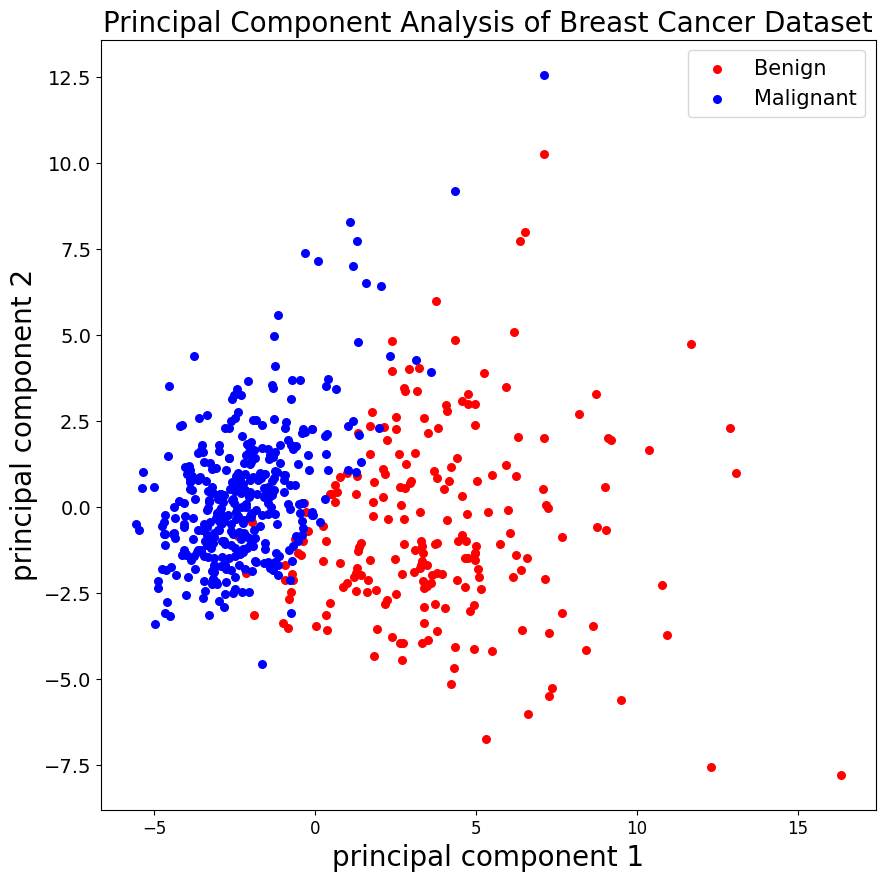

In [16]:
plt.figure()
plt.figure(figsize = (10,10))

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel("principal component 1",fontsize = 20)
plt.ylabel("principal component 2",fontsize = 20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize = 20)

targets = ['Benign', 'Malignant']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = cancer_df["label"] == target
    plt.scatter(cancer_pca_df.loc[indices_to_keep, 'principal component 1'],
                cancer_pca_df.loc[indices_to_keep, 'principal component 2'],
                c = color, s = 30)

plt.legend(targets,prop = {'size': 15});
plt.show()

# Data Visualization using PCA - CIFAR-10


In [17]:
print("np.min(X_train) =", np.min(X_train))
print("np.max(X_train) =", np.max(X_train))

print("np.min(X_test) =", np.min(X_test))
print("np.max(X_test) =", np.max(X_test))

np.min(X_train) = 0
np.max(X_train) = 255
np.min(X_test) = 0
np.max(X_test) = 255


In [18]:
X_train = X_train / np.max(X_train)
X_test  = X_test  / np.max(X_test)

print("np.min(X_train) =", np.min(X_train))
print("np.max(X_train) =", np.max(X_train))

print("np.min(X_test) =", np.min(X_test))
print("np.max(X_test) =", np.max(X_test))

np.min(X_train) = 0.0
np.max(X_train) = 1.0
np.min(X_test) = 0.0
np.max(X_test) = 1.0


In [19]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened  = X_test.reshape(X_test.shape[0], -1)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(800, 3072)
(200, 3072)


In [20]:
feature_columns = ['pixel' + str(i) for i in range(X_train_flattened.shape[1])]

cifar_df = pd.DataFrame(X_train_flattened, columns = feature_columns)

cifar_df["label"] = y_train

print(cifar_df.shape)

(800, 3073)


In [21]:
cifar_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [22]:
cifar_pca = PCA(n_components = 2)

cifar_principal_components = cifar_pca.fit_transform(cifar_df.iloc[:1000,:-1])

cifar_pca_df = pd.DataFrame(data = cifar_principal_components,
                            columns = ["principal component 1", "principal component 2"])

cifar_pca_df['y'] = y_train

# Calculate explained variance ratio
explained_variance_ratio = cifar_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the results
print("Explained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3f} cumulative)")
    
cifar_pca_df.head()

Explained variance ratio by component:
PC1: 0.290 (0.290 cumulative)
PC2: 0.111 (0.401 cumulative)


,principal component 1,principal component 2,y
0,-6.647671,1.990157,6
1,0.891439,-1.805314,9
2,8.013133,-10.264463,9
3,-10.416198,-0.580872,4
4,-2.317651,-4.752451,1


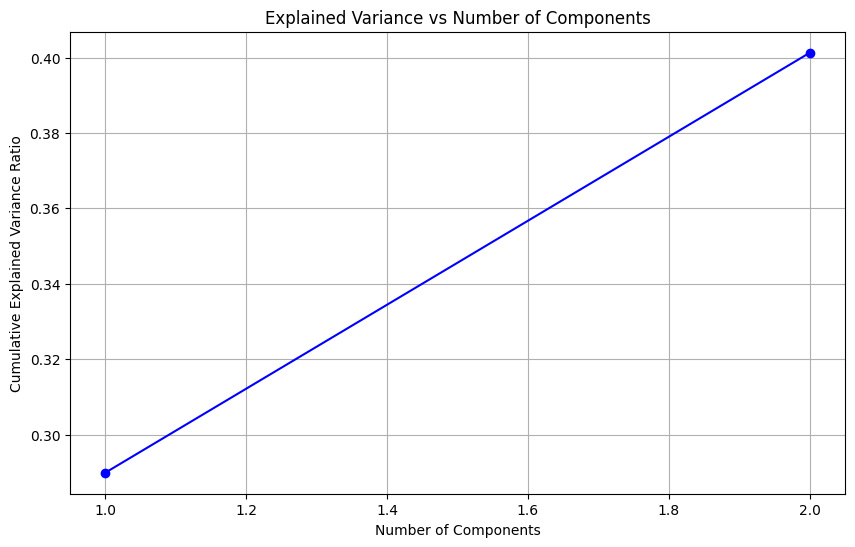

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cifar_pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

****DataFrame of feature loadings****

In [24]:
loadings = pd.DataFrame(
    cifar_pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(cifar_pca.components_))],
)

print("\nFeature loadings:")
print(loadings)


Feature loadings:
           PC1       PC2
0     0.026066 -0.013914
1     0.027862 -0.014942
2     0.032226 -0.016979
3     0.025862 -0.013999
4     0.027847 -0.014747
...        ...       ...
3067  0.013233  0.024099
3068  0.016217  0.023664
3069  0.012300  0.023859
3070  0.013185  0.023012
3071  0.015946  0.022758

[3072 rows x 2 columns]


Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

Its time to visualize the CIFAR-10 data in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.


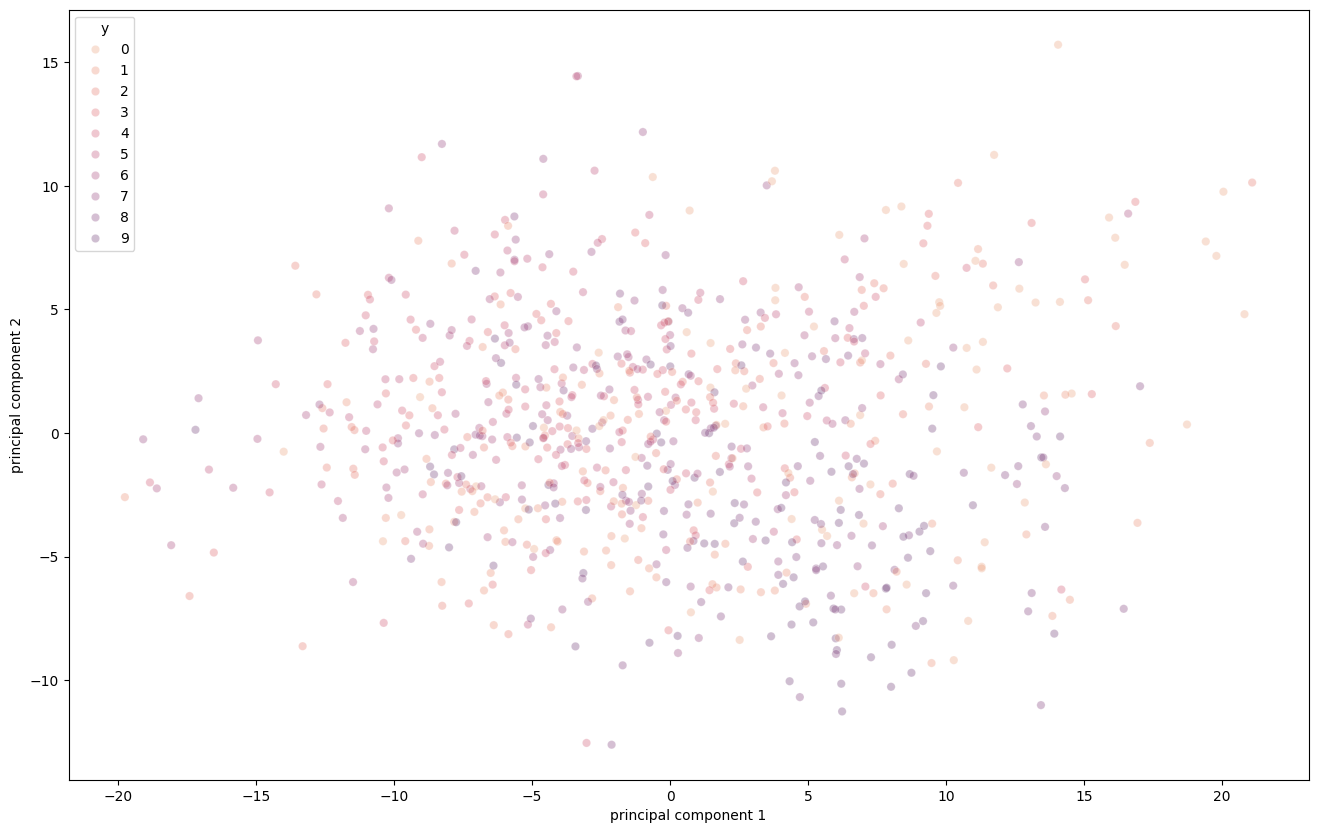

In [25]:
import seaborn as sns

plt.figure(figsize = (16, 10))

sns.scatterplot(
    x = "principal component 1",
    y = "principal component 2",
    hue = "y",
    palette = sns.color_palette("flare", 10),
    data = cifar_pca_df,
    legend = "full",
    alpha = 0.3
)

plt.show()

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

# Comparison with Other Dimensionality Reduction Techniques

While PCA is linear and works well for preserving global structure, techniques like t-SNE is non-linear and excel at preserving local structure.

#### t-SNE
- Focuses on local similarities between points.
- Suitable for visualizing high-dimensional data in 2D or 3D.


#### Example: Applying t-SNE Breast Cancer Dataset


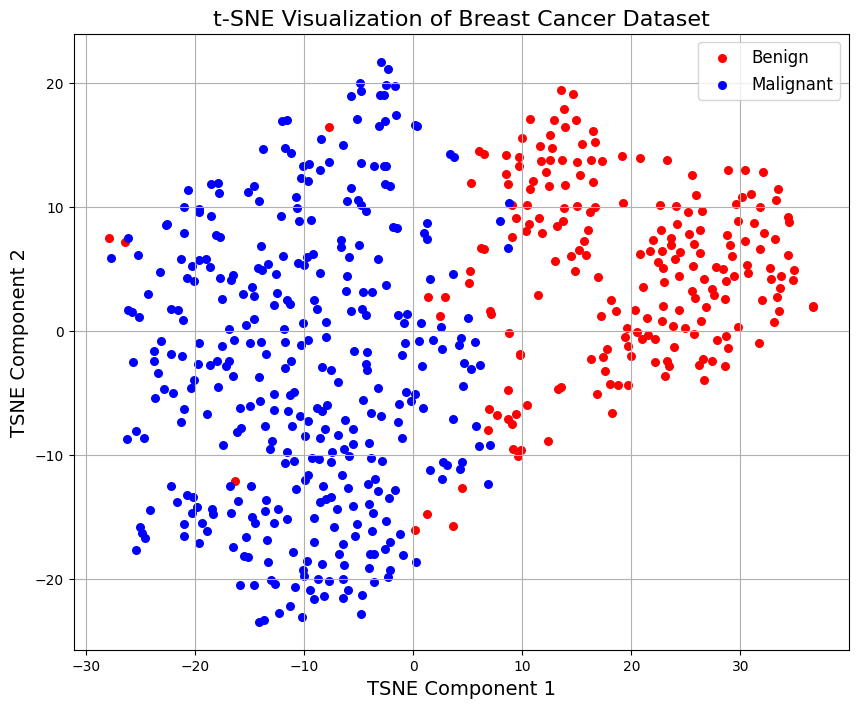

In [26]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Convert to DataFrame for easy visualization
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['label'] = cancer_labels

# Plot t-SNE results
plt.figure(figsize=(10, 8))
labels = ['Benign', 'Malignant']
colors = ['r', 'b']

for label, color in zip([0, 1], colors):
    indices = tsne_df['label'] == label
    plt.scatter(tsne_df.loc[indices, 'TSNE Component 1'],
                tsne_df.loc[indices, 'TSNE Component 2'],
                c=color, s=30, label=labels[label])

plt.title('t-SNE Visualization of Breast Cancer Dataset', fontsize=16)
plt.xlabel('TSNE Component 1', fontsize=14)
plt.ylabel('TSNE Component 2', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#### Example: Applying t-SNE CIFAR-10 Dataset


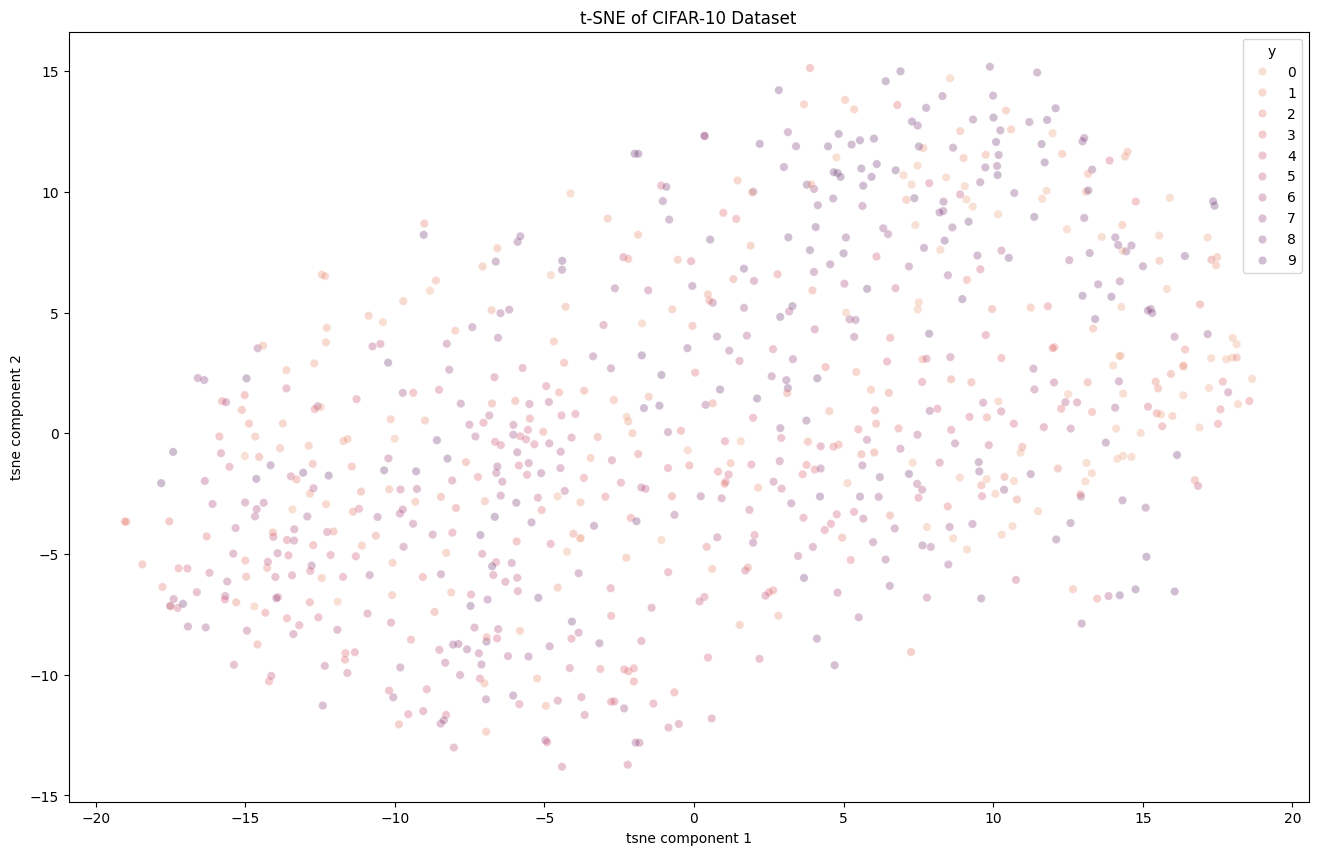

In [27]:
# Apply t-SNE for dimensionality reduction
cifar_tsne = TSNE(n_components=2, random_state=42)
cifar_tsne_components = cifar_tsne.fit_transform(X_train_flattened)

# Create a DataFrame for the t-SNE components
cifar_tsne_df = pd.DataFrame(data=cifar_tsne_components, columns=["tsne component 1", "tsne component 2"])
cifar_tsne_df['y'] = y_train

# Plot the t-SNE results
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne component 1",
    y="tsne component 2",
    hue="y",
    palette=sns.color_palette("flare", 10),
    data=cifar_tsne_df,
    legend="full",
    alpha=0.3
)

plt.title("t-SNE of CIFAR-10 Dataset")
plt.show()

## Observations

### PCA:
* The plot generated using PCA in the image demonstrates a distribution where the data points are spread along the axes of greatest variance. While there might be some overlap, PCA allows for a good understanding of the overall variance structure in the data.
* PCA can reveal clear clusters or separations in datasets with linearly separable features.
### t-SNE:
* The t-SNE plot in the image shows distinct clusters, emphasizing local data similarities. It often forms compact, visually distinct groups, even if the global relationships between clusters are distorted.
* t-SNE is useful for exploring inherent groupings in the data that might not be apparent in PCA.

PCA is ideal for understanding your data's variance and for reducing feature in tasks such as classification or regression. It is deterministic, meaning the results are reproducible, unlike t-SNE, which is stochastic and can yield different outputs on multiple runs. PCA is the more appropriate choice if you are primarily interested in analyzing variance or using the results for further computations. However, if your goal is visualization and exploring possible clusters or relationships, t-SNE can provide more intuitive insights.

### TO DO

1. Apply other dimensionality reduction methods to both datasets.

2. Record and compare your observations with the results of PCA.



# Results Obervations and TO DO List for Deep Learning Training with CIFAR-10 Dataset

**Observations**

**With PCA:**

1. **Training Accuracy**: The model with PCA shows a significant improvement in training accuracy, reaching 86.26% by the 10th epoch.

2. **Validation Accuracy**: Validation accuracy fluctuates and remains low (peaking at 32%), indicating potential overfitting to the training set or loss of important features during PCA.

3. **Loss**: The training loss decreases steadily, but the validation loss increases after a few epochs, showing overfitting.

**Without PCA:**

1. **Training Accuracy**: The model struggles to learn, with training accuracy stagnating around 15% by the 10th epoch.

2. **Validation Accuracy**: Validation accuracy remains consistently low, never exceeding 24%.

3. **Loss**: Training loss decreases slightly but is much higher compared to the PCA case, indicating difficulty in fitting the high-dimensional data.

### TO DO

1. Use 3D scatterplot to plot the first 3 principle components of the CIFAR-10 dataset.

2. Try different batch size, epoch, size of training and testing input data.

3. Use appropriate plots to compare the results, performance, speed etc of the deep learning models with and without PCA

4. Perform deep learning on the breast cancer dataset and compare the results for with and without PCA



# END.